Minh Tan Pham A01215507


ACIT 4880 Lab 4

Print the first 10 records from the data set. (churn.csv)

In [290]:
import pandas as pd

# Load the dataset
data = pd.read_csv('churn.csv')

# Print the first 10 records
print(data.head(10))

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103  

Investigate using bar chart the churn variable, and print the percentages (Fig. 1).
Comment on that (any insights?). 

Churn Percentages:
Churn?
False.    85.508551
True.     14.491449
Name: count, dtype: float64


C:\Users\tanph\AppData\Local\Temp\ipykernel_20484\2622446452.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(xval + 0.05, bar.get_y() + bar.get_height()/2, f'{round(churn_percentages[i], 2)}%', va='center')


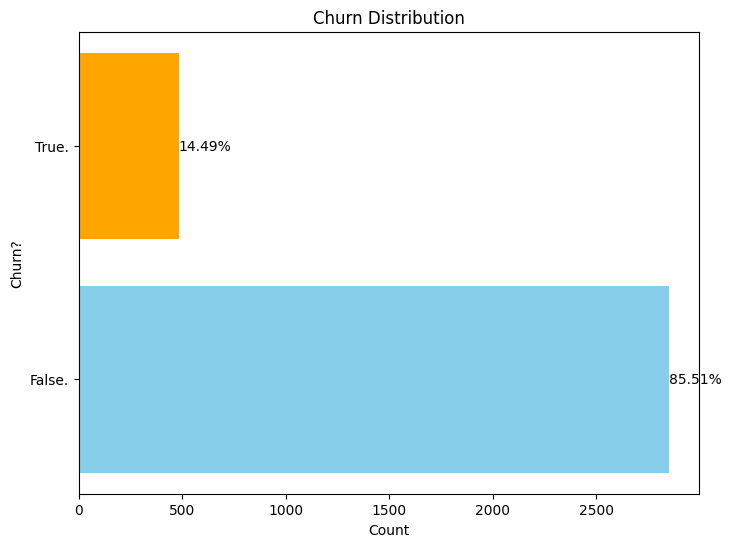

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('churn.csv')

# Count the number of True and False in 'Churn?' column
churn_counts = data['Churn?'].value_counts()

# Calculate percentages
churn_percentages = churn_counts / len(data) * 100

# Print percentages
print("Churn Percentages:")
print(churn_percentages)

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Count')
plt.ylabel('Churn?')

# Add percentage detail on top of each bar
for i, bar in enumerate(bars):
    xval = bar.get_width()
    plt.text(xval + 0.05, bar.get_y() + bar.get_height()/2, f'{round(churn_percentages[i], 2)}%', va='center')

plt.show()


Investigate the “International Plan” variable using stacked bar chart (Fig. 2), and
normalized stacked bar charts (Fig. 3). 

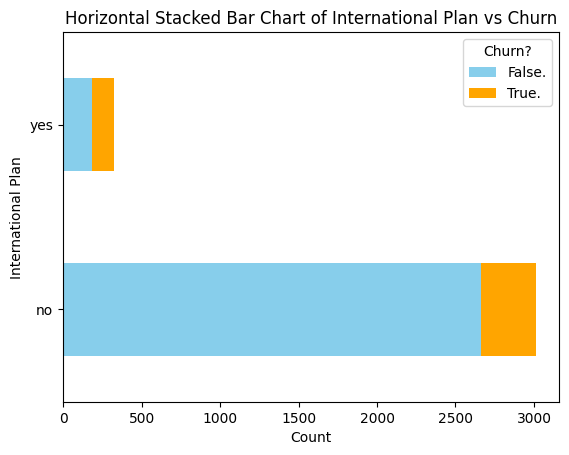

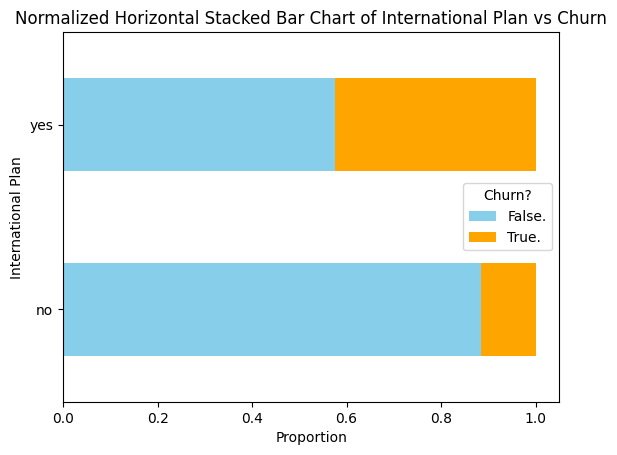

In [292]:
# Create a cross-tabulation of 'International Plan' and 'Churn?' variables
ct = pd.crosstab(data['Int\'l Plan'], data['Churn?'])

# Create horizontal stacked bar chart (Fig. 2)
ct.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('Horizontal Stacked Bar Chart of International Plan vs Churn')
plt.xlabel('Count')
plt.ylabel('International Plan')
plt.show()

# Create normalized horizontal stacked bar chart (Fig. 3)
ct_norm = ct.div(ct.sum(axis=1), axis=0)  # Normalize the cross-tabulation
ct_norm.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('Normalized Horizontal Stacked Bar Chart of International Plan vs Churn')
plt.xlabel('Proportion')
plt.ylabel('International Plan')
plt.show()


Get the contingency table

In [293]:
# Create a contingency table
contingency_table = pd.crosstab(data['Churn?'],data["Int'l Plan"], margins=True)

# Calculate column percentages
column_percentages = contingency_table.div(contingency_table.loc['All'], axis=1) * 100

# Format the contingency table with percentages, excluding the last row
formatted_table = pd.concat([contingency_table.iloc[:-1].astype(str) + ' (' + column_percentages.iloc[:-1].round(1).astype(str) + '%)', 
                            contingency_table.iloc[-1:].astype(str)])

print("Contingency Table with Counts and Percentages:")
print(formatted_table)


Contingency Table with Counts and Percentages:
Int'l Plan            no          yes           All
Churn?                                             
False.      2664 (88.5%)  186 (57.6%)  2850 (85.5%)
True.        346 (11.5%)  137 (42.4%)   483 (14.5%)
All                 3010          323          3333


Now for Voice Mail Plan

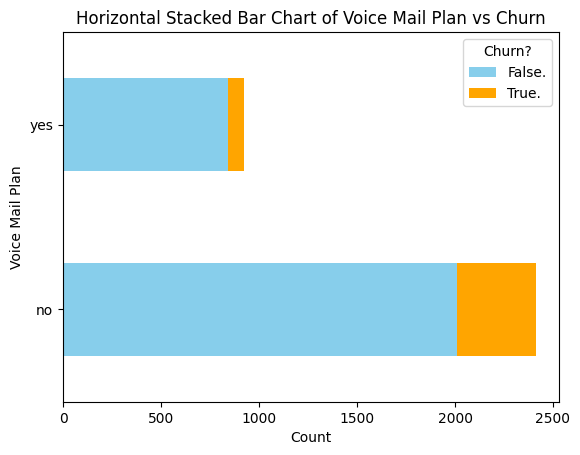

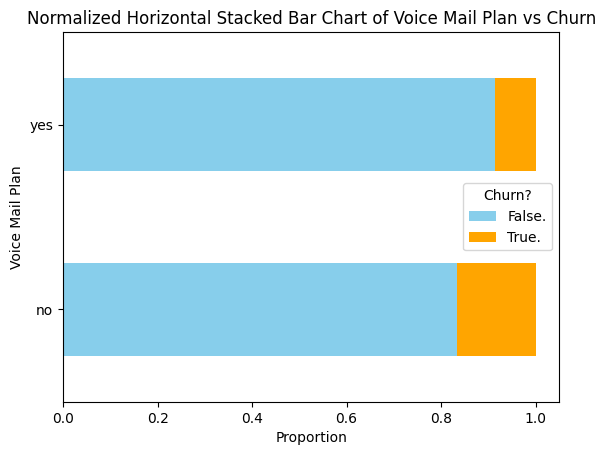

In [294]:
# Create a cross-tabulation of 'Voice Mail Plan' and 'Churn?' variables
ct = pd.crosstab(data['VMail Plan'], data['Churn?'])

# Create horizontal stacked bar chart (Fig. 2)
ct.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('Horizontal Stacked Bar Chart of Voice Mail Plan vs Churn')
plt.xlabel('Count')
plt.ylabel('Voice Mail Plan')
plt.show()

# Create normalized horizontal stacked bar chart (Fig. 3)
ct_norm = ct.div(ct.sum(axis=1), axis=0)  # Normalize the cross-tabulation
ct_norm.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('Normalized Horizontal Stacked Bar Chart of Voice Mail Plan vs Churn')
plt.xlabel('Proportion')
plt.ylabel('Voice Mail Plan')
plt.show()


In [295]:
# Create a contingency table
contingency_table = pd.crosstab(data['Churn?'],data["VMail Plan"], margins=True)

# Calculate column percentages
column_percentages = contingency_table.div(contingency_table.loc['All'], axis=1) * 100

# Format the contingency table with percentages, excluding the last row
formatted_table = pd.concat([contingency_table.iloc[:-1].astype(str) + ' (' + column_percentages.iloc[:-1].round(1).astype(str) + '%)', 
                            contingency_table.iloc[-1:].astype(str)])

print("Contingency Table with Counts and Percentages:")
print(formatted_table)


Contingency Table with Counts and Percentages:
VMail Plan            no          yes           All
Churn?                                             
False.      2008 (83.3%)  842 (91.3%)  2850 (85.5%)
True.        403 (16.7%)    80 (8.7%)   483 (14.5%)
All                 2411          922          3333


Get a histogram with churn and without churn for the customers service call
variable, what do you conclude?

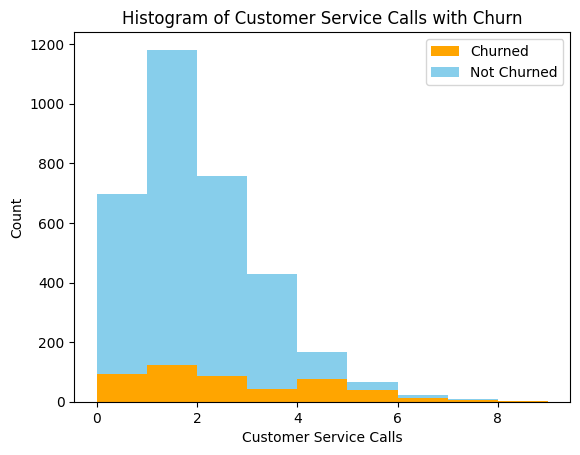

In [296]:
# Separate the data into churned and not churned
churned = data[data['Churn?'] == 'True.']['CustServ Calls']
not_churned = data[data['Churn?'] == 'False.']['CustServ Calls']

# Create histogram
plt.hist([churned, not_churned], bins=range(0, 10), stacked=True, color=['orange', 'skyblue'], label=['Churned', 'Not Churned'])


plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.title('Histogram of Customer Service Calls with Churn')
plt.legend()

plt.show()

Repeat for the Day Minutes variable

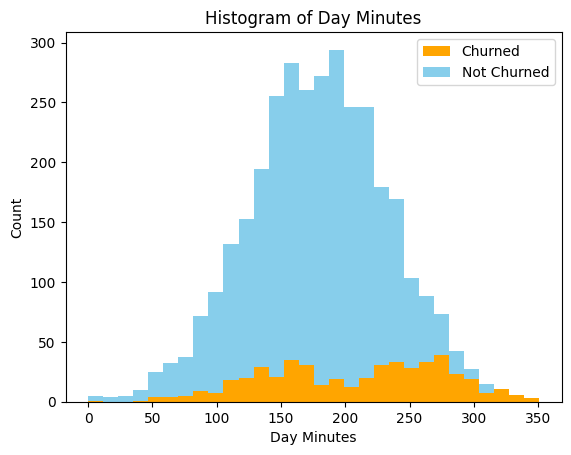

In [297]:
# Separate the data into churned and not churned
churned = data[data['Churn?'] == 'True.']['Day Mins']
not_churned = data[data['Churn?'] == 'False.']['Day Mins']

# Create histograms
plt.hist([churned, not_churned], bins=30, stacked=True, color=['orange', 'skyblue'], label=['Churned', 'Not Churned'])

# Set up labels and title
plt.xlabel('Day Minutes')
plt.ylabel('Count')
plt.title('Histogram of Day Minutes')
plt.legend()

plt.show()

Analyze the multivariate relationships between Day Minutes and Evening Minutes

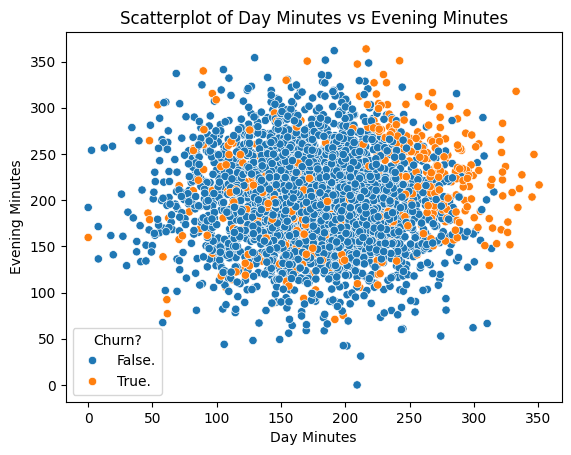

In [298]:
import seaborn as sns
# Create a scatterplot of 'Day Minutes' and 'Evening Minutes'
sns.scatterplot(x='Day Mins', y='Eve Mins', hue='Churn?', data=data)

# Set up labels and title
plt.xlabel('Day Minutes')
plt.ylabel('Evening Minutes')
plt.title('Scatterplot of Day Minutes vs Evening Minutes')

# Show the plot
plt.show()

Bin the Customer Service calls variable into Low (< 4 calls) and high (>= 4), and get the
churn rate for Low and High customers service calls. 

In [299]:
# Bin the 'CustServ Calls' variable
data['CustServ Calls'] = pd.cut(data['CustServ Calls'], bins=[0, 3, data['CustServ Calls'].max()], labels=['Low', 'High'])

# Calculate churn rate
churn_rate = data.groupby('CustServ Calls', observed=True)['Churn?'].apply(lambda x: (x == 'True.').mean())

print(churn_rate)


CustServ Calls
Low     0.106796
High    0.516854
Name: Churn?, dtype: float64


Get the correlation plot for Day Minutes, Day Charge, Night Minutes, Night Charge
variables.

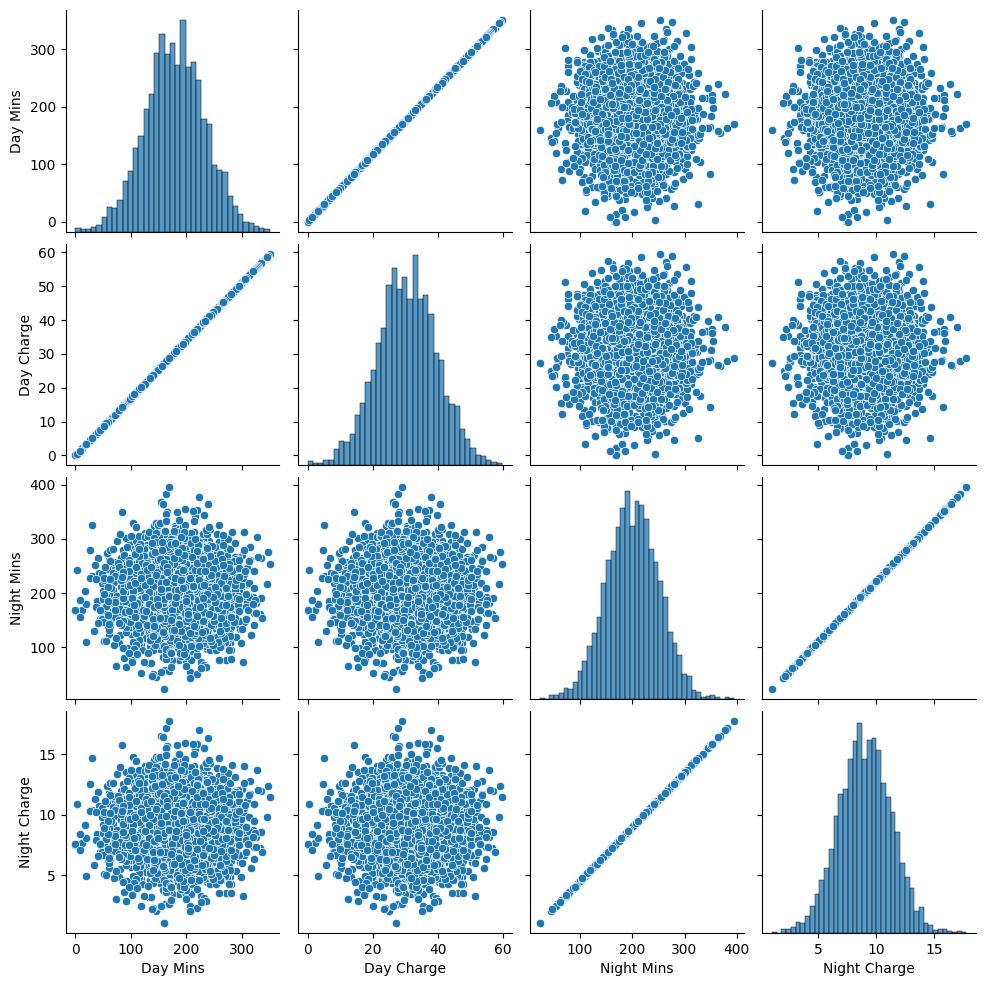

In [300]:
import numpy as np

# Select the variables
variables = ['Day Mins', 'Day Charge', 'Night Mins', 'Night Charge']

# Create scatterplots
sns.pairplot(data[variables])
plt.show()